<a href="https://colab.research.google.com/github/Moneeba136/ml-mini-projects/blob/main/task-3-forest-cover-type-classification/Forest_Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns


FileNotFoundError: [Errno 2] No such file or directory: 'covtype.csv'

### Method 1: Uploading from your local machine (temporary)

This method is quick for one-off uploads, but the file will be deleted when the Colab runtime restarts or disconnects. Use this if you only need the file for the current session.

In [3]:
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3409980483.py", line 4, in <cell line: 0>
    uploaded = files.upload()
               ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/google/colab/files.py", line 69, in upload
    uploaded_files = _upload_files(multiple=True)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/google/colab/files.py", line 169, in _upload_files
    result = _output.eval_js(
             ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/google/colab/output/_js.py", line 40, in eval_js
    return _message.read_reply_from_input(request_id, timeout_sec)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_message.py", line 96, in read_rep

TypeError: object of type 'NoneType' has no len()

In [4]:
from google.colab import files

print("Please select the 'covtype.csv' file to upload:")
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Please select the 'covtype.csv' file to upload:


Saving covtype.csv to covtype.csv
User uploaded file "covtype.csv" with length 75170064 bytes


In [5]:
df = pd.read_csv("covtype.csv")


In [6]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
num_cols = X.columns[:10]   # first 10 are numeric

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [10]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [12]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    objective="multi:softmax",
    num_class=7
)

# Adjust y_train and y_test to be 0-indexed for XGBoost
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

xgb.fit(X_train, y_train_adjusted)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=7, ...)

In [13]:
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)


In [14]:
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("XGBoost:\n", classification_report(y_test, xgb_pred))


Random Forest:
               precision    recall  f1-score   support

           1       0.91      0.85      0.88     42368
           2       0.87      0.94      0.90     56661
           3       0.92      0.93      0.92      7151
           4       0.90      0.84      0.87       549
           5       0.97      0.39      0.56      1899
           6       0.91      0.79      0.85      3473
           7       0.98      0.87      0.92      4102

    accuracy                           0.89    116203
   macro avg       0.92      0.80      0.84    116203
weighted avg       0.89      0.89      0.89    116203

XGBoost:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.10      0.14      0.11     42368
           2       0.03      0.00      0.01     56661
           3       0.08      0.01      0.01      7151
           4       0.00      0.00      0.00       549
           5       0.00      0.01      0.00      189

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

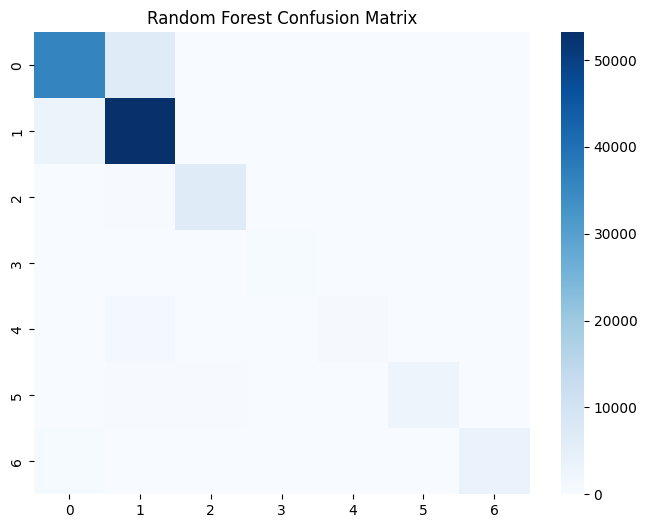

In [15]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


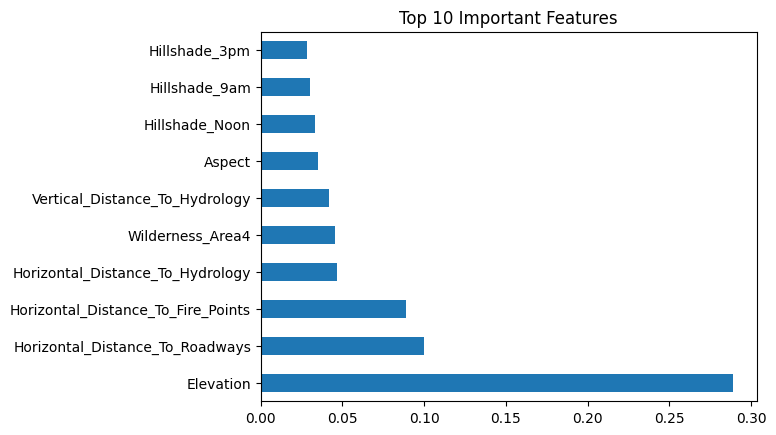

In [16]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)

feat_imp.nlargest(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [10, 20],
    "n_estimators": [100, 200]
}

grid = GridSearchCV(rf, params, cv=3, scoring="accuracy")
grid.fit(X_train, y_train)

grid.best_params_


{'max_depth': 20, 'n_estimators': 200}